In [3]:
# to visualize data
import matplotlib.pyplot as plt
# to browse directory
import os
# to manage dataframes
import pandas as pd
import numpy as np
# to calculate the time to run the codes
from datetime import datetime
# the deep learning framework (TensorFlow)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0,DenseNet121,MobileNetV2,EfficientNetV2S
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
SEED_VALUE = 1234
np.random.seed(SEED_VALUE)
import random
random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
import h5py
import datetime
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight
%matplotlib inline
import torch

In [57]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Path dataset
TRAIN_PATH = "C:\\Users\\Matthew\\Downloads\\archive (13)\\UTKFace\\train"
VAL_PATH = "C:\\Users\\Matthew\\Downloads\\archive (13)\\UTKFace\\val"
TEST_PATH = "C:\\Users\\Matthew\\Downloads\\archive (13)\\UTKFace\\test"

# Transformasi untuk preprocessing gambar
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Sesuaikan ukuran ini dengan yang diharapkan oleh model VOLO
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset menggunakan ImageFolder
train_dataset = ImageFolder(root=TRAIN_PATH, transform=transform)
val_dataset = ImageFolder(root=VAL_PATH, transform=transform)
test_dataset = ImageFolder(root=TEST_PATH, transform=transform)

# DataLoader untuk training, validation, dan test set
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [30]:
# Transformasi untuk preprocessing gambar pada training dataset
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Augmentasi: flip horizontal secara acak
    transforms.ColorJitter(brightness=0.2),  # Augmentasi: atur kecerahan secara acak (nilai dapat disesuaikan)
    transforms.RandomRotation(degrees=10),  # Contoh augmentasi: rotasi secara acak hingga 10 derajat
    #transforms.RandomResizedCrop(224, scale=(0.8, 1.0), ratio=(0.75, 1.333)),  # Contoh augmentasi: pergeseran dan scaling secara acak
    transforms.Resize((224, 224)),  # Resize ke ukuran 224x224 pixel
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Transformasi untuk preprocessing gambar pada validation dan test dataset
eval_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize ke ukuran 224x224 pixel
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset menggunakan ImageFolder dengan transformasi yang sesuai
train_dataset = ImageFolder(root=TRAIN_PATH, transform=train_transform)
val_dataset = ImageFolder(root=VAL_PATH, transform=eval_transform)
test_dataset = ImageFolder(root=TEST_PATH, transform=eval_transform)

# DataLoader untuk training, validation, dan test set
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

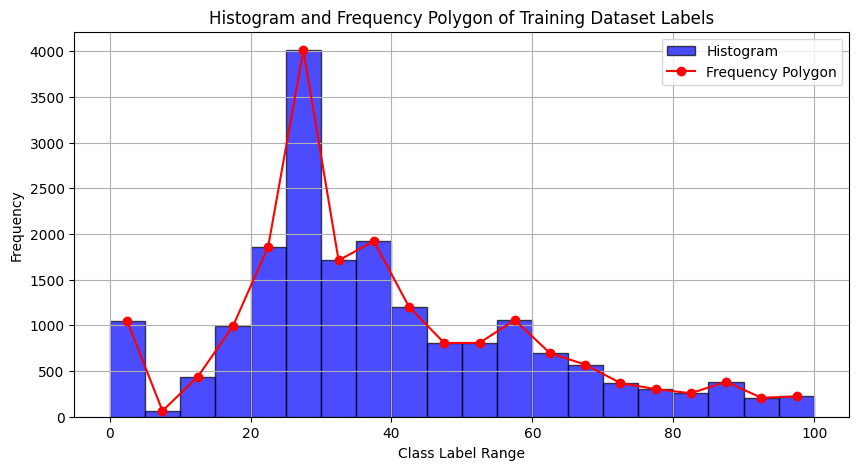

In [20]:
# Kumpulkan semua label dari dataset pelatihan
all_labels = []
for _, labels in train_loader:
    all_labels.extend(labels.numpy())

# Konversi daftar label menjadi array numpy
all_labels = np.array(all_labels)

# Definisikan rentang bin
bins = [0, 5, 10, 15, 20,25, 30,35, 40,45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, np.inf]

# Plot histogram
plt.figure(figsize=(10, 5))
counts, bin_edges, _ = plt.hist(all_labels, bins=bins, edgecolor='black', alpha=0.7, color='blue', label='Histogram')

# Poligon frekuensi
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.plot(bin_centers, counts, marker='o', color='red', label='Frequency Polygon')

plt.title('Histogram and Frequency Polygon of Training Dataset Labels')
plt.xlabel('Class Label Range')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

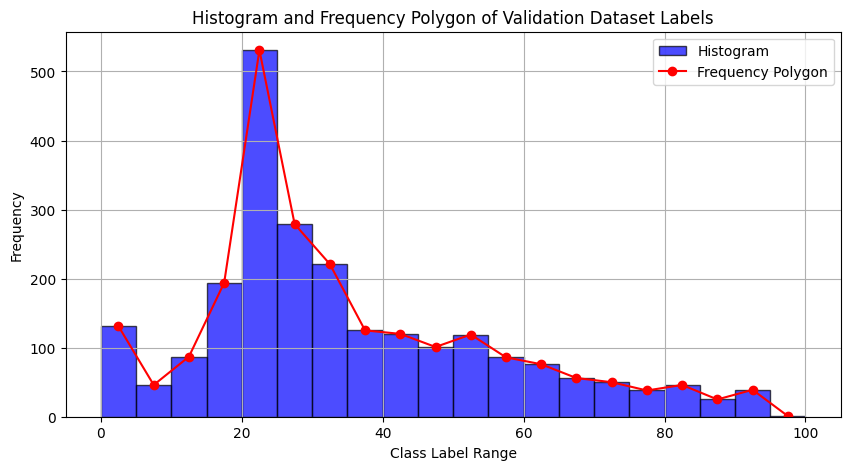

In [22]:
# Kumpulkan semua label dari dataset pelatihan
all_labels = []
for _, labels in val_loader:
    all_labels.extend(labels.numpy())

# Konversi daftar label menjadi array numpy
all_labels = np.array(all_labels)

# Definisikan rentang bin
bins = [0, 5, 10, 15, 20,25, 30,35, 40,45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, np.inf]

# Plot histogram
plt.figure(figsize=(10, 5))
counts, bin_edges, _ = plt.hist(all_labels, bins=bins, edgecolor='black', alpha=0.7, color='blue', label='Histogram')

# Poligon frekuensi
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.plot(bin_centers, counts, marker='o', color='red', label='Frequency Polygon')

plt.title('Histogram and Frequency Polygon of Validation Dataset Labels')
plt.xlabel('Class Label Range')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

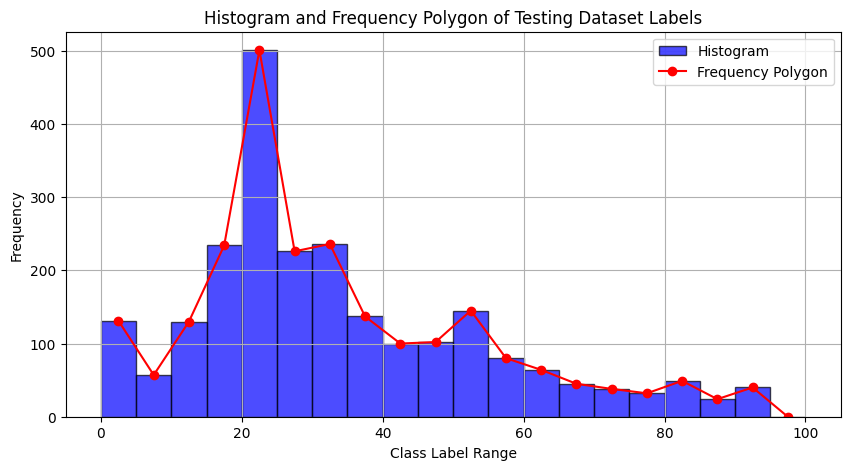

In [23]:
# Kumpulkan semua label dari dataset pelatihan
all_labels = []
for _, labels in test_loader:
    all_labels.extend(labels.numpy())

# Konversi daftar label menjadi array numpy
all_labels = np.array(all_labels)

# Definisikan rentang bin
bins = [0, 5, 10, 15, 20,25, 30,35, 40,45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, np.inf]

# Plot histogram
plt.figure(figsize=(10, 5))
counts, bin_edges, _ = plt.hist(all_labels, bins=bins, edgecolor='black', alpha=0.7, color='blue', label='Histogram')

# Poligon frekuensi
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.plot(bin_centers, counts, marker='o', color='red', label='Frequency Polygon')

plt.title('Histogram and Frequency Polygon of Testing Dataset Labels')
plt.xlabel('Class Label Range')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import timm
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

# Buat model VOLO dasar
base_model = timm.create_model('volo_d1_224', pretrained=True, num_classes=0)

class CustomVOLO(nn.Module):
    def __init__(self, base_model):
        super(CustomVOLO, self).__init__()
        self.base_model = base_model
        
        # Dapatkan jumlah fitur output dari base model
        if hasattr(base_model, 'num_features'):
            num_features = base_model.num_features
        else:
            # Jika tidak ada atribut num_features, gunakan nilai default
            num_features = 384  # Sesuaikan nilai ini jika perlu

        # Tambahkan layer dense dengan 64 node dan batch normalization
        self.dense = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.BatchNorm1d(64),
            nn.ReLU()
        )
        
        # Tambahkan output layer dengan 1 node untuk regresi
        self.output = nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.base_model(x)
        x = self.dense(x)
        x = self.output(x)
        return x

# Buat instance dari model kustom
model = CustomVOLO(base_model)

# Bekukan (freeze) backbone
for param in model.base_model.parameters():
    param.requires_grad = False

# Aktifkan gradient hanya untuk lapisan yang ditambahkan
for param in model.dense.parameters():
    param.requires_grad = True
for param in model.output.parameters():
    param.requires_grad = True

# Definisikan loss function untuk regresi
criterion = nn.L1Loss()  

# Definisikan optimizer (hanya untuk parameter yang dapat dilatih)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

# Pindahkan model ke GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

C:\Users\Matthew\anaconda3\envs\TestENV\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


kalau code dibawah ini error hapus aja, ganti pake yang gw comment

tapi kalau jalan, yang bawah ttp di comment ya. pokoknya salah satu aja yg dijalanin karena sama sama train, cuma yg satu di plotting juga

Epoch 1/10, Batch 0/593, Loss: 27.7833
Epoch 1/10, Batch 100/593, Loss: 33.1425
Epoch 1/10, Batch 200/593, Loss: 20.4797
Epoch 1/10, Batch 300/593, Loss: 19.6005
Epoch 1/10, Batch 400/593, Loss: 21.0618
Epoch 1/10, Batch 500/593, Loss: 14.7930
Epoch 1/10, Train Loss: 23.1037, Validation Loss: 13.9826
Epoch 2/10, Batch 0/593, Loss: 10.2078
Epoch 2/10, Batch 100/593, Loss: 12.4895
Epoch 2/10, Batch 200/593, Loss: 14.4119
Epoch 2/10, Batch 300/593, Loss: 12.4979
Epoch 2/10, Batch 400/593, Loss: 11.1627
Epoch 2/10, Batch 500/593, Loss: 11.8272
Epoch 2/10, Train Loss: 12.2225, Validation Loss: 12.5939
Epoch 3/10, Batch 0/593, Loss: 10.1560
Epoch 3/10, Batch 100/593, Loss: 17.6620
Epoch 3/10, Batch 200/593, Loss: 11.6921
Epoch 3/10, Batch 300/593, Loss: 12.4172
Epoch 3/10, Batch 400/593, Loss: 11.6362
Epoch 3/10, Batch 500/593, Loss: 11.7398
Epoch 3/10, Train Loss: 11.8830, Validation Loss: 12.8736
Epoch 4/10, Batch 0/593, Loss: 9.9768
Epoch 4/10, Batch 100/593, Loss: 10.4759
Epoch 4/10, Bat

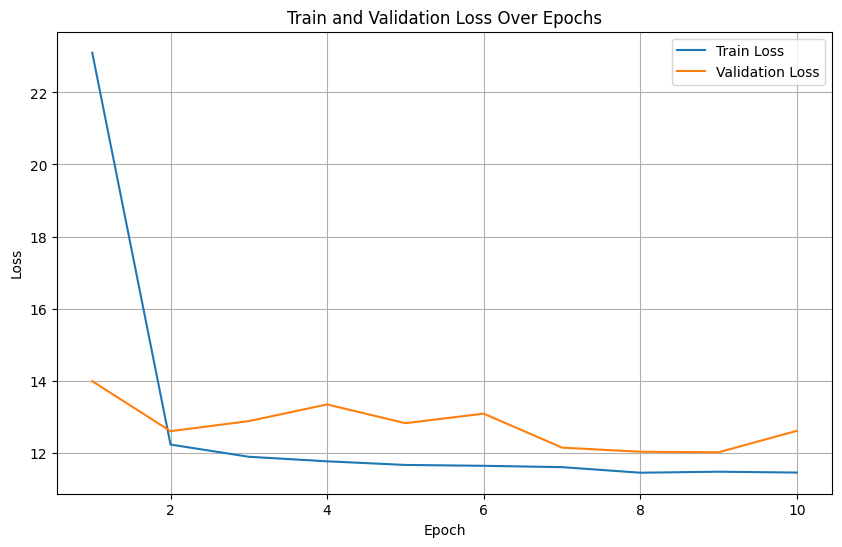

In [32]:
import matplotlib.pyplot as plt

num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device).float().unsqueeze(1)
        
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, targets in val_loader:
            data, targets = data.to(device), targets.to(device).float().unsqueeze(1)
            outputs = model(data)
            val_loss += criterion(outputs, targets).item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
'''
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device).float().unsqueeze(1)
        
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')
    
    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, targets in val_loader:
            data, targets = data.to(device), targets.to(device).float().unsqueeze(1)
            outputs = model(data)
            val_loss += criterion(outputs, targets).item()
    
    val_loss /= len(val_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')'''

"\nnum_epochs = 10\nfor epoch in range(num_epochs):\n    model.train()\n    for batch_idx, (data, targets) in enumerate(train_loader):\n        data, targets = data.to(device), targets.to(device).float().unsqueeze(1)\n        \n        optimizer.zero_grad()\n        outputs = model(data)\n        loss = criterion(outputs, targets)\n        loss.backward()\n        optimizer.step()\n        \n        if batch_idx % 100 == 0:\n            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')\n    \n    # Validation\n    model.eval()\n    val_loss = 0\n    with torch.no_grad():\n        for data, targets in val_loader:\n            data, targets = data.to(device), targets.to(device).float().unsqueeze(1)\n            outputs = model(data)\n            val_loss += criterion(outputs, targets).item()\n    \n    val_loss /= len(val_loader)\n    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}')"

In [33]:
# Evaluasi pada test set
model.eval()
test_loss = 0
with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device).float().unsqueeze(1)
        outputs = model(data)
        test_loss += criterion(outputs, targets).item()

test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 12.7142


In [59]:
# import torch
import torch.nn as nn
from sklearn.metrics import r2_score
import numpy as np

model.eval()
all_targets = []
all_outputs = []

with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device).float().unsqueeze(1)
        outputs = model(data)
        all_targets.extend(targets.cpu().numpy())
        all_outputs.extend(outputs.cpu().numpy())

all_targets = np.array(all_targets)
all_outputs = np.array(all_outputs)

# R²
r2 = r2_score(all_targets, all_outputs)

# MAE
mae = nn.L1Loss()(torch.tensor(all_outputs), torch.tensor(all_targets)).item()

# MSE
mse = nn.MSELoss()(torch.tensor(all_outputs), torch.tensor(all_targets)).item()

# RMSE
rmse = np.sqrt(mse)

print(f'Test R²: {r2:.4f}')
print(f'Test MAE: {mae:.4f}')
print(f'Test MSE: {mse:.4f}')
print(f'Test RMSE: {rmse:.4f}')

Test R²: 0.3987
Test MAE: 11.8559
Test MSE: 262.7597
Test RMSE: 16.2099


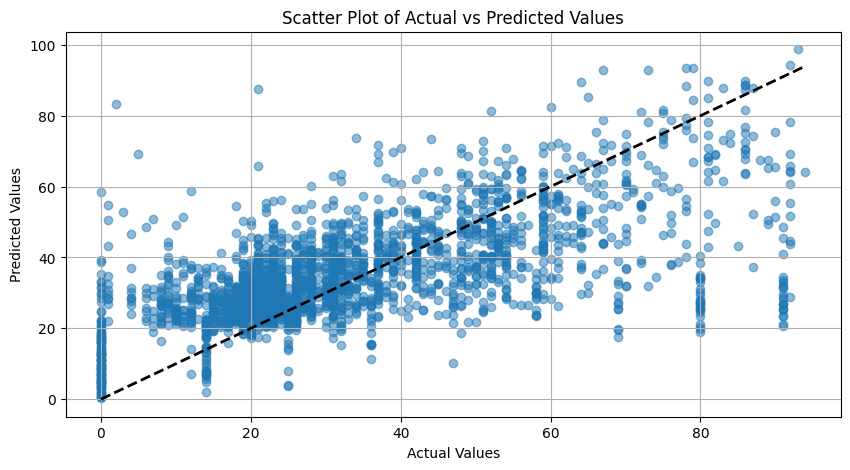

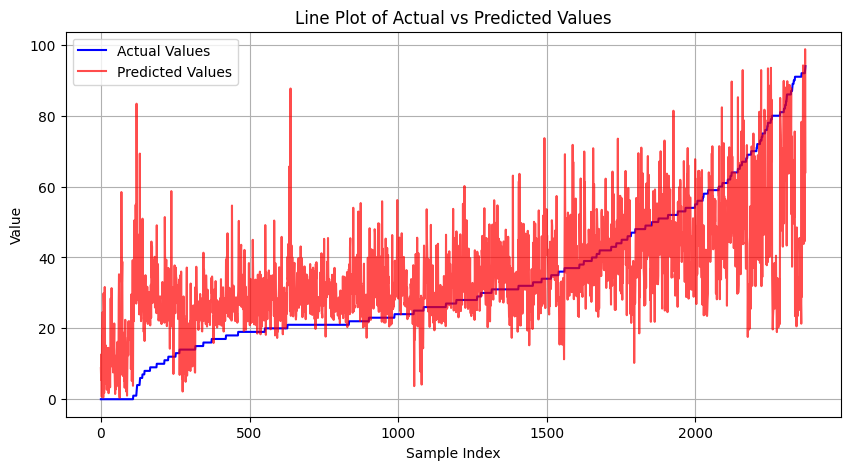

In [24]:
# Fungsi untuk mendapatkan nilai prediksi dari model
def get_predictions_and_labels(loader, model, device):
    model.eval()
    predictions = []
    actuals = []
    
    with torch.no_grad():
        for data in loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())
    
    return np.array(predictions), np.array(actuals)

# Dapatkan prediksi dan nilai aktual dari test loader
predictions, actuals = get_predictions_and_labels(test_loader, model, device)

# Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Line Plot
plt.figure(figsize=(10, 5))
plt.plot(actuals, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Line Plot of Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Shape of feature maps: torch.Size([1, 384, 14, 14])
Predicted value for image 1: 67.14209747314453
Shape of feature maps: torch.Size([1, 384, 14, 14])
Predicted value for image 2: 9.3928861618042
Shape of feature maps: torch.Size([1, 384, 14, 14])
Predicted value for image 3: 55.00400924682617
Shape of feature maps: torch.Size([1, 384, 14, 14])
Predicted value for image 4: 37.15687942504883


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape of feature maps: torch.Size([1, 384, 14, 14])
Predicted value for image 5: 4.700999736785889

Model structure:
CustomVOLO(
  (base_model): VOLO(
    (patch_embed): PatchEmbed(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (8): ReLU(inplace=True)
      )
      (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (network): Modul

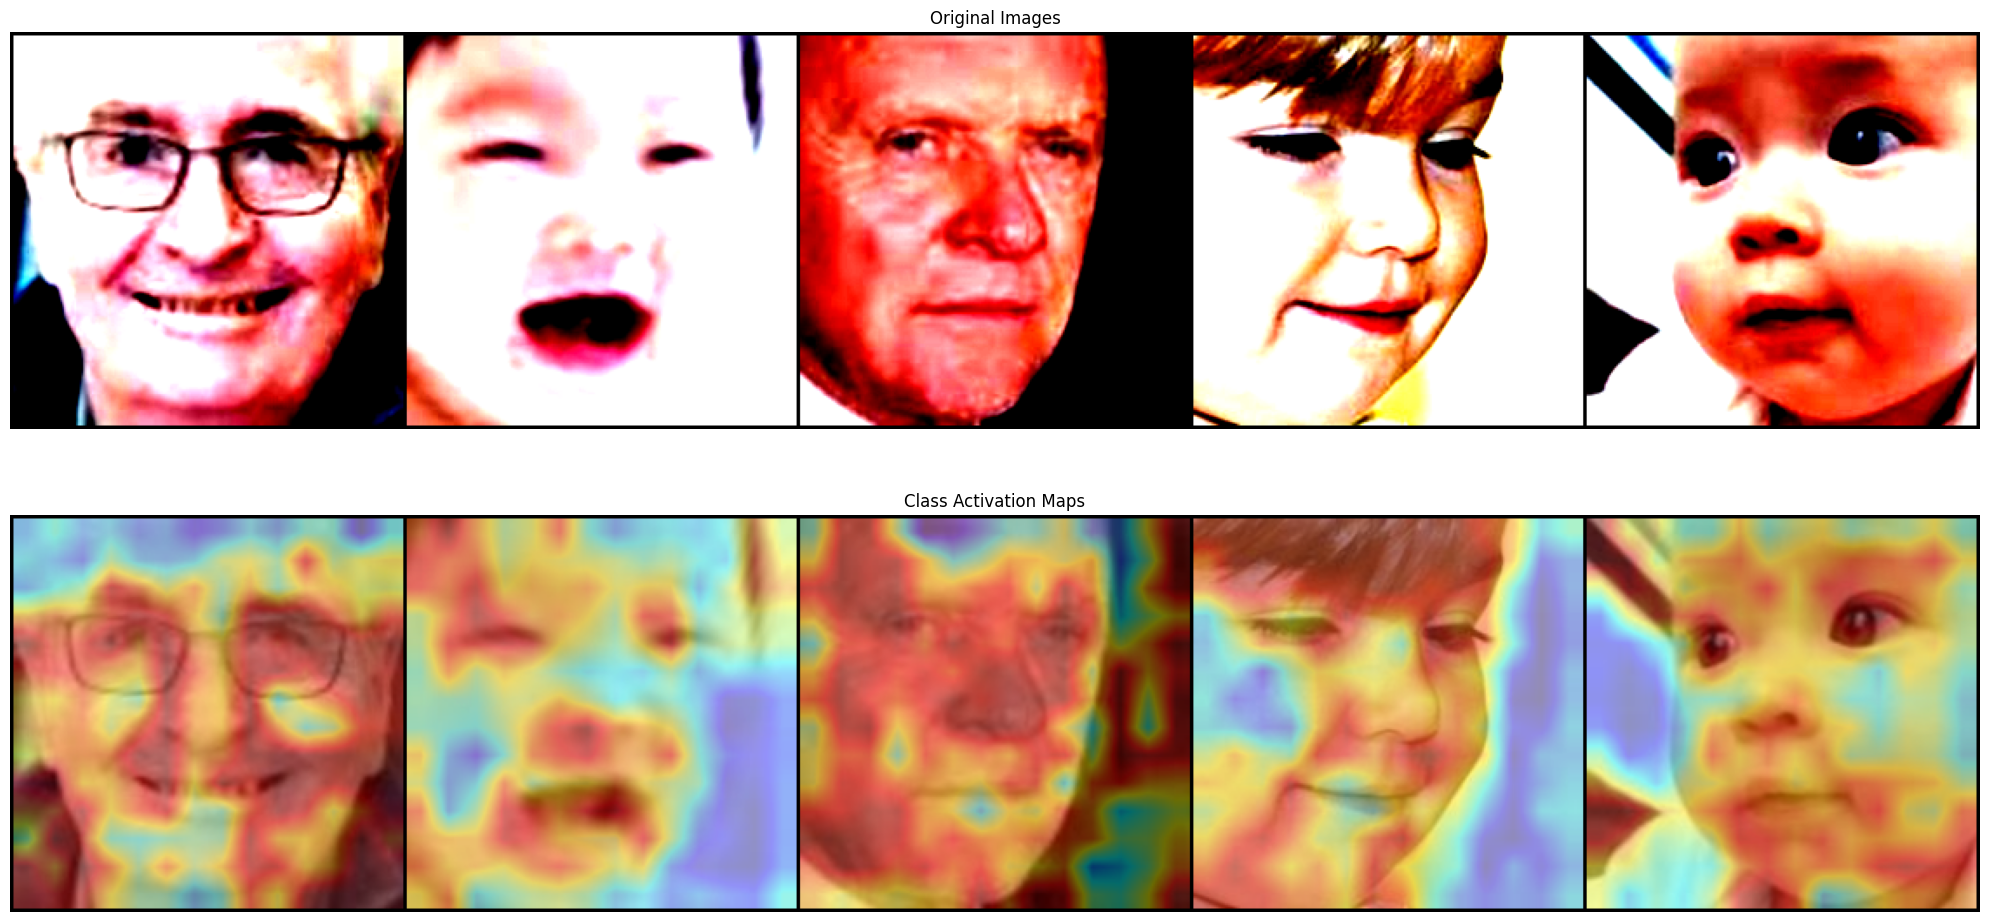

Labels for the images:
Image 1: Label 68, Class: 69
Image 2: Label 0, Class: 1
Image 3: Label 60, Class: 61
Image 4: Label 14, Class: 2
Image 5: Label 0, Class: 1


In [56]:
def get_last_conv_layer(model):
    """Fungsi untuk mendapatkan layer konvolusi terakhir dari model"""
    last_conv_layer = None
    for module in model.modules():
        if isinstance(module, torch.nn.Conv2d):
            last_conv_layer = module
    return last_conv_layer

def get_cam(model, img_tensor):
    # Pastikan img_tensor memiliki dimensi yang benar (batch, channel, height, width)
    if img_tensor.dim() == 5:
        img_tensor = img_tensor.squeeze(0)
    elif img_tensor.dim() == 3:
        img_tensor = img_tensor.unsqueeze(0)
    
    # Daftar untuk menyimpan aktivasi
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook

    # Dapatkan layer konvolusi terakhir
    last_conv_layer = get_last_conv_layer(model)
    if last_conv_layer is None:
        raise ValueError("Tidak dapat menemukan layer konvolusi dalam model")

    # Daftarkan hook untuk mendapatkan output dari layer konvolusi terakhir
    last_conv_layer.register_forward_hook(get_activation('last_conv'))

    # Forward pass
    with torch.no_grad():
        output = model(img_tensor)
    
    # Dapatkan feature maps dari layer terakhir
    feature_maps = activation['last_conv']
    
    print(f"Shape of feature maps: {feature_maps.shape}")
    
    # Karena kita tidak memiliki bobot untuk layer terakhir (AvgPool2d),
    # kita akan menggunakan rata-rata dari semua channel sebagai CAM
    cam = torch.mean(feature_maps, dim=1).squeeze(0)
    cam = F.relu(cam)
    
    # Normalisasi CAM
    cam = cam - torch.min(cam)
    cam = cam / torch.max(cam)
    
    return cam.numpy()

# Dalam loop utama
cam_images = []
for i, img in enumerate(images):
    img_tensor = img.unsqueeze(0)  # Tambahkan dimensi batch
    try:
        cam = get_cam(model, img_tensor)
        cam_img = visualize_cam(img, cam)
        cam_images.append(torch.from_numpy(cam_img).permute(2, 0, 1))
        
        # Tampilkan nilai prediksi
        with torch.no_grad():
            predicted_value = model(img_tensor).item()
        print(f"Predicted value for image {i+1}: {predicted_value}")
    except Exception as e:
        print(f"Error processing image {i+1}: {str(e)}")
        # Tambahkan gambar asli jika terjadi error
        cam_images.append(img)

# Setelah loop
print("\nModel structure:")
print(model)

# Buat grid dari gambar CAM
cam_grid = make_grid(cam_images, nrow=5)

# Tampilkan hasil
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.imshow(original_grid.permute(1, 2, 0))
plt.title('Original Images')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(cam_grid.permute(1, 2, 0))
plt.title('Class Activation Maps')
plt.axis('off')

plt.tight_layout()
plt.show()

# Tampilkan label untuk setiap gambar
print("Labels for the images:")
for i, label in enumerate(labels):
    print(f"Image {i+1}: Label {label}, Class: {test_dataset.classes[label] if label < len(test_dataset.classes) else 'Unknown'}")

In [60]:
import cv2
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
from filterpy.kalman import KalmanFilter

# Inisialisasi model (sesuaikan dengan cara Anda menginisialisasi model PyTorch)
# Misalnya: model = CustomVOLO(base_model).to(device)
# Pastikan model dalam mode evaluasi
#model.eval()

# Transformasi untuk preprocessing gambar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Inisialisasi detektor wajah Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)  # Gunakan kamera default, jika ingin mengambil video tambahkan path video sebagai argumen

# Inisialisasi Filter Kalman
kalman = KalmanFilter(dim_x=1, dim_z=1)
kalman.x = np.array([[0.]])  # Nilai awal prediksi
kalman.F = np.array([[1.]])  # Matriks transisi
kalman.H = np.array([[1.]])  # Matriks pengukuran
kalman.P *= 1000.  # Matriks kovarian prediksi awal
kalman.R = 5  # Noise pengukuran
kalman.Q = 0.1  # Noise proses

# Fungsi untuk melakukan preprocessing pada ROI menggunakan transformasi PyTorch
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah BGR ke RGB
    image = Image.fromarray(image)  # Konversi dari numpy array ke PIL Image
    image = transform(image)  # Terapkan transformasi
    image = image.unsqueeze(0)  # Tambahkan batch dimension
    return image

while True:
    ret, frame = cap.read()
    
    # Flip frame secara horizontal
    frame = cv2.flip(frame, 1)
    
    # Deteksi wajah menggunakan Haar Cascade
    faces = face_cascade.detectMultiScale(frame, 1.3, 5)
    
    for (x, y, w, h) in faces:
        # Gambar kotak persegi deteksi wajah
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Ambil ROI (Region of Interest) dari frame
        roi = frame[y:y+h, x:x+w]
        
        # Resize ROI menjadi ukuran 224x224
        roi_resized = cv2.resize(roi, (224, 224), interpolation=cv2.INTER_AREA)
        
        # Preprocessing pada ROI menggunakan transformasi PyTorch
        roi_tensor = preprocess_image(roi_resized).to(device)
        
        # Prediksi kelas dengan model
        with torch.no_grad():
            result = model(roi_tensor).cpu().numpy()[0]
        
        # Update Filter Kalman dengan hasil prediksi
        kalman.predict()
        kalman.update(result)
        
        # Ambil nilai prediksi yang telah difilter
        filtered_result = kalman.x[0][0]
        
        # Tampilkan hasil prediksi yang telah difilter pada frame
        cv2.putText(frame, str(filtered_result), (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
    
    # Tampilkan frame
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == 13:  # Tekan tombol "Enter" untuk keluar
        break

cap.release()
cv2.destroyAllWindows()

In [29]:
# Simpan state dict dari model
torch.save(model.state_dict(), 'custom_volo_model.pth')

# Simpan arsitektur model, state dict, dan informasi tambahan dalam satu file
torch.save({
    'model_state_dict': model.state_dict(),
    'model_architecture': 'CustomVOLO',
    'transform': {
        'train_transform': train_transform,
        'eval_transform': eval_transform
    }
}, 'custom_volo_model_with_arch.pth')

In [6]:
# Muat arsitektur model, state dict, dan informasi tambahan dari file yang disimpan
checkpoint = torch.load('custom_volo_model_with_arch.pth')

# Buat kembali instance dari model kustom dengan arsitektur yang sesuai
model = CustomVOLO(base_model)

# Pindahkan model ke GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Muat state dict yang telah disimpan
model.load_state_dict(checkpoint['model_state_dict'])

# Pastikan model berada di mode evaluasi
model.eval()

# Muat kembali transformasi jika diperlukan
train_transform = checkpoint['transform']['train_transform']
eval_transform = checkpoint['transform']['eval_transform']

# Sekarang model siap untuk digunakan kembali untuk evaluasi atau pengujian
